<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# !pip install -U seaborn
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# display(df.head())

# перечень названий столбцов таблицы df
# print(df.columns)
pd.set_option('max_columns', None)
display(df.sample(20, random_state=0))
df.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4631,2,7570000.0,67.00,2017-11-10T00:00:00,2,NaN,25.0,29.00,2,NaN,False,False,18.00,2.0,Санкт-Петербург,7711.0,13845.0,1.0,1326.0,0.0,NaN,60.0
17913,15,2490000.0,30.20,2018-11-06T00:00:00,1,2.50,5.0,16.60,5,NaN,False,False,5.50,NaN,Кронштадт,67816.0,49542.0,2.0,445.0,2.0,387.0,32.0
21278,8,2850000.0,54.00,2016-01-26T00:00:00,2,NaN,5.0,32.00,5,NaN,False,False,9.00,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,467.0
22608,9,8580000.0,94.00,2017-11-02T00:00:00,4,2.80,6.0,61.35,2,NaN,False,False,10.43,NaN,Санкт-Петербург,22562.0,3828.0,0.0,NaN,1.0,627.0,52.0
2606,11,12000000.0,84.68,2017-06-19T00:00:00,2,NaN,9.0,45.40,8,NaN,False,False,16.40,0.0,Санкт-Петербург,32121.0,5080.0,0.0,NaN,3.0,457.0,127.0
8120,10,1990000.0,56.50,2018-07-10T00:00:00,3,NaN,4.0,28.40,2,NaN,False,False,5.30,NaN,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,28.0
13147,12,4000000.0,41.90,2017-11-23T00:00:00,3,2.50,5.0,29.90,2,NaN,False,False,5.10,NaN,Санкт-Петербург,10429.0,11670.0,0.0,NaN,1.0,920.0,294.0
2535,11,4500000.0,50.00,2018-08-31T00:00:00,4,2.70,5.0,36.00,4,NaN,False,False,NaN,NaN,Санкт-Петербург,11902.0,14081.0,0.0,NaN,1.0,507.0,23.0
10457,20,3630000.0,38.00,2017-10-17T00:00:00,1,2.65,6.0,18.00,6,NaN,False,False,8.30,1.0,Санкт-Петербург,34714.0,15016.0,1.0,584.0,1.0,750.0,126.0
15307,12,6000000.0,60.90,2019-04-11T00:00:00,2,2.88,4.0,40.40,1,NaN,False,False,7.80,NaN,Санкт-Петербург,15992.0,6583.0,2.0,394.0,0.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
print('Явных дубликатов в таблице:', (df.duplicated().sum()))

Явных дубликатов в таблице: 0


In [3]:
#Определим период, за который были размещены объявления о продаже 
print(df['first_day_exposition'].min(), df['first_day_exposition'].max())

2014-11-27T00:00:00 2019-05-03T00:00:00


### Вывод

Таблица включает в себя 23699 записей об объектах жилой недвижимости с характеристиками, отражёнными в 22 колонках. В датасете представлен архив объявлений размещенных в период с 27 ноября 2014 года по 03 мая 2019 года.

Более чем в половине столбцов есть пропущенные значения(количество значений в столбцах отличается).

Так, наибольший процент пропущенных значений в столбцах 'is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony',
'ceiling_height'- 88, 66, 62, 49 и 39% соответственно.

По 23 процента пропусков содержат 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'days_exposition' — 13%. 

Менее чем по 10% наличие пропусков в колонках с площадью кухни(9,6%), жилой площади(8%) и общим количеством этажей в доме(0,4%) 

'locality_name'содержит всего 49 пропусков (0,2%), так же, у данного столбца есть проблема с неявными дубликатами (например:'посёлок Мурино',  'поселок Мурино', 'Мурино')

Так как число парков и водоёмов в радиусе трёх километров, в том числе расстояния до ближайших, а также растояние до аэропорта  не влияют на исследование(не участвуют в расчетах), то пропуски оставим  в начальном состоянии.
___

Требуется изменить типы данных в следующих колонках:
        
    - 'floors_total'         - тип должен быть 'int'
    
    - 'balcony'              - тип должен быть 'int'
    
    - 'is_apartment'         - тип должен быть 'bool'
 


## Предобработка данных

### Пропуски

**'balcony'**

Колонка **'balcony'** заполнялась пользователями сайта, вероятно, что при отсутствии балкона, продавцы оставляли данную ячейку незаполненной, чтобы не "заморачиваться". В данном случае, логично заполнить пропуски нулём.

In [4]:
# Колонка 'balcony'
print('Пустых значений до замены:', df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print('Пустых значений в balcony после замены:', df['balcony'].isna().sum())

Пустых значений до замены: 11519
Пустых значений в balcony после замены: 0


**'floors_total'**

Может быть этот столбец и не понадобится


In [5]:
print('Пустых значений в floors_total до замены:', df['floors_total'].isna().sum())

print(df['floors_total'].value_counts())
print(df[df['floors_total'].isna()])
# максимальное число этажей на 2019 год = 37 ЖК "Князь Александр Невский"
display(df[df['floors_total'] > 37])

Пустых значений в floors_total до замены: 86
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64
       total_images  last_price  total_area first_day_exposition  rooms  \
186              12  11640000.0        65.2  2018-10-02T00:00:00      2   
237               4   2438033.0        28.1  2016-11-23T00:00:00      1   
457               4   9788348.0        70.8  2015-08-01T00:00:00      2   
671               4   6051191.0        93.6  2017-04-06T00:00:00      3   
1757              5   3600000.0        39.0  2017-04-22T00:00:00      1   
... 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


**'locality_name'**

In [6]:
print('Пустых значений до замены:', df['locality_name'].isna().sum())
df['locality_name'] = df['locality_name'].fillna('Неизвестно')
print('Пустых значений после замены:', df['locality_name'].isna().sum())

Пустых значений до замены: 49
Пустых значений после замены: 0


**'living_area'**

In [7]:
print('Пустых значений в living_area до замены:', df['living_area'].isna().sum())


Пустых значений в living_area до замены: 1903


**'kitchen_area'**

In [8]:
print('Пустых значений в kitchen_area до замены:', df['kitchen_area'].isna().sum())

Пустых значений в kitchen_area до замены: 2278


**'ceiling_height'**

Заменим недостающие значения на медиану: ~2.77 похоже на стандартную высоту потолков в подавляющем большинстве домов. 

In [9]:
print('Пустых значений в "ceiling_height"до замены:', df['ceiling_height'].isna().sum())

display(df[df['ceiling_height'] > 5.1].sort_values(by='ceiling_height'))

# Заменим пустые значения в столбце на медианное значение высоты потолка
median_ceiling_height = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling_height)
print('Пустых значений в "ceiling_height" после замены:', df['ceiling_height'].isna().sum())


Пустых значений в "ceiling_height"до замены: 9195


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,NaN,5,NaN,False,False,NaN,0.0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,NaN,False,False,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,NaN,False,False,15.6,0.0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,False,False,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,False,False,8.0,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0


Пустых значений в "ceiling_height" после замены: 0


**'days_exposition'**

Пропущенные значения в данном столбце - результат ошибки при работе базы данных. Например: при создании объявления данное поле выставляется в NaN, а при смене суток значение увеличется на +1 к текущему. И если объявление было снято в тот же день, скорее всего в базе остался NaN. Таким образом можно его заменить на 0

In [10]:
print('Пустых значений в days_exposition до замены:', df['days_exposition'].isna().sum())
df['days_exposition'] = df['days_exposition'].fillna('0')
print('Пустых значений в days_exposition после замены:', df['days_exposition'].isna().sum())

Пустых значений в days_exposition до замены: 3181
Пустых значений в days_exposition после замены: 0


In [11]:
print('Пустых значений в cityCenters_nearest  до замены:', df['cityCenters_nearest'].isna().sum())

Пустых значений в cityCenters_nearest  до замены: 5519


### Дубликаты

In [12]:
# импортируем pymystem3 для лемматизации:
from pymystem3 import Mystem
m = Mystem()

# <Присвоим переменной 'locality_list' список уникальных значений населенных пунктов>
locality_list = df['locality_name'].unique()
print(locality_list)

# импортируем Counter для подсчёта лемматизированных слов в 'locality_list'
from collections import Counter

lemmas = []

for location in locality_list:
    lemma = m.lemmatize(location)
    lemmas += lemma

print(Counter(lemmas))

# def location_change(location):
#         if 'санкт-петербург' in location:
#             return 'Санкт-Петербург'
#         if '' in location or '' in location:
#             return  'недвижимость'
#         if '' in location:
#             return  'свадьба'
#         if '' in location:
#             return 'образование'
        
# cnt = 0
# for row in df['locality_name']:
#     df.loc[cnt, 'locality_name'] = location_change(row)
#     cnt += 1

display(df['locality_name'].value_counts())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
деревня Пижма                          1
село Никольское                        1
посёлок Платформа 69-й километр        1
деревня Тойворово                      1
посёлок Алексеевка                     1
Name: locality_name, Length: 365, dtype: int64

   
Избавиться от неявных дубликатов не удалось. Задача оказалась очень трудоёмкой. Позже поняла, что это не обязательно, так как для работы нам нужны топ 10 населенных пунктов с наибольшим количеством объявлений. Несмотря на то, что имеются неявные дубликаты и  среди этих 10 топовых 'locality_name', на расчеты, в рамках поставленной задачи, они не влияют.




### Изменение типов данных

In [13]:
# Методом to_datetime(), переведём строковые значения столбца 'first_day_exposition' в даты. 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')
df['days_exposition'] = df['days_exposition'].astype('int')


## Расчёты и добавление результатов в таблицу

first_day_exposition 

In [14]:
# создадим новый столбец датасета, где расчитаем цену квадратного метра
df['prise_per_m2'] = df['last_price'] / df['total_area']

# создадим новые столбцы датасета:'week_day_exp', 'month_exp','year_exp':
df['week_day_exp'] = df['first_day_exposition'].dt.weekday 
df['month_exp'] = df['first_day_exposition'].dt.month
df['year_exp'] = df['first_day_exposition'].dt.year


# рассчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_to_total_ratio'] = df['living_area'] / df['total_area']
df['kitchen_to_total_ratio'] = df['kitchen_area'] / df['total_area']

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prise_per_m2,week_day_exp,month_exp,year_exp,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,0.320000,0.410000


Добавим колонку 'floors_grouping', где для распределения по группам , нам понадобится значения максимального количества этажей в доме и этажа квартиры. Первый этаж,  если 'floor' = 1, Последний этаж, если 'floor' = 'floors_total', иначе - 'Другой'

In [15]:
# посчитаем и добавим в таблицу:этаж квартиры; варианты — первый, последний, другой

def  floors_grouping(this_floor, total_floor):
     
    if this_floor == 1:
        return 'первый'
    if this_floor == total_floor:
        return 'последний'    
    else:
        return 'другой'

df['floors_grouping'] = df.apply(lambda x: floors_grouping(x['floor'], x['floors_total']), axis=1)

display(df['floors_grouping'].value_counts())
display(df.head())

другой       17446
последний     3336
первый        2917
Name: floors_grouping, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prise_per_m2,week_day_exp,month_exp,year_exp,living_to_total_ratio,kitchen_to_total_ratio,floors_grouping
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019,0.472222,0.231481,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,0.612500,0.148214,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,NaN,NaN,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,0.320000,0.410000,другой


## Исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

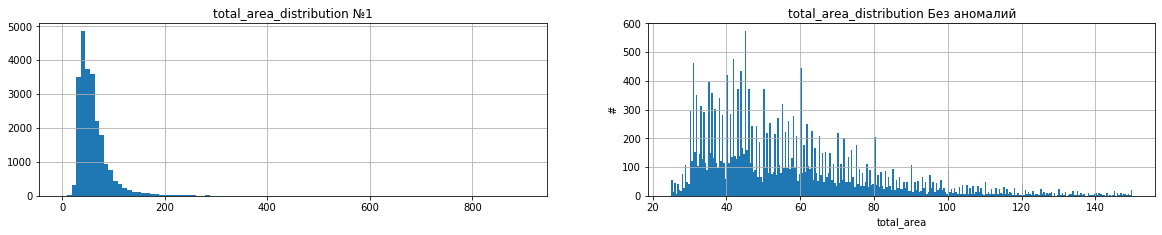

In [16]:
#изучены следующие параметры: площадь, цена, число комнат, высота потолков
#df['total_area'].hist(range=(0,900), bins=100)

plt.figure(figsize=(20,7))
plt.subplot(2, 2, 1)
plt.title("total_area_distribution №1")
df['total_area'].hist(range=(0,900), bins=100)
plt.subplot(2, 2, 2)
df['total_area'].hist(range=(25,150), bins=300)
plt.xlabel("total_area")
plt.ylabel("#")
plt.title("total_area_distribution Без аномалий")
df['total_area'].describe()


В связи с тем, что в колонке общей площади присутствуют аномалии (12, 900 м2) которые на графике №1 не визуализирется, принято решение увеличить детализацию без учета аномалий. Из гистограммы №2 видно, что пиковые значения по количеству квартир располагаются в диапозоне от 30 до 80 метров. Квартиры большей площадью гораздо меньше, они формируют "длинный хвост" гистограммы. 

**для ревьюера**

sns.histplot(data=df['total_area'], kde=True )

Не удалось запустить в тренажере 

count    23699.000000
mean         6.541597
std         10.887011
min          0.010000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

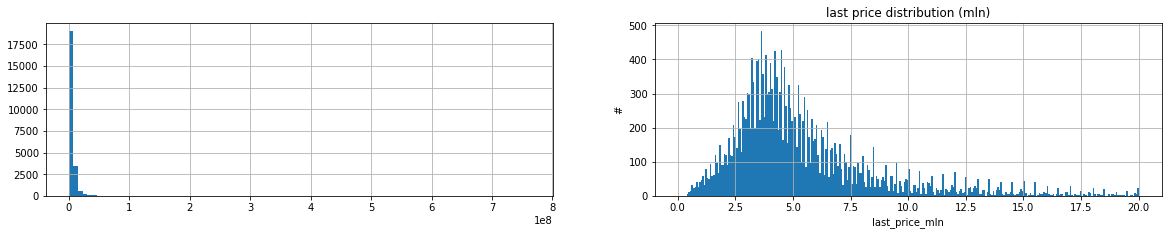

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(2, 2, 1)
df['last_price'].hist(bins=100)
plt.subplot(2, 2, 2)
df['last_price_mln'] = round(df['last_price']/1000000, 2)
df['last_price_mln'].hist(range=(0, 20), bins=300)
plt.xlabel("last_price_mln")
plt.ylabel("#")
plt.title("last price distribution (mln)")

df['last_price_mln'].describe()

Для изучения параметра 'last_price' создан столбец 'last_price_mln' (с целью улучшения визуализации), значения в котором перевели из рублей в милионы, округлив до 2 знака. Здесь так же имеется большой разброс данных, аномалии( 10 тысяч рублей и 763 миллиона рублей), 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

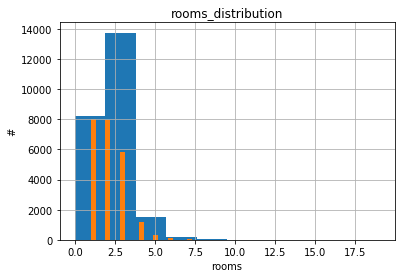

In [18]:
df['rooms'].hist()
df['rooms'].hist(range=(1, 10), bins=30)
plt.xlabel("rooms")
plt.ylabel("#")
plt.title("rooms_distribution")
df['rooms'].describe()

Присутствуют аномалии (0 комнат, 19 комнат). На рынке самые ходовые 1, 2-х комнатные квартиры, с некоторым отрывом 3-х комнатные. Чем больше количество комнат, тем меньше количество предложений на рынке. Видна зависмость количесва предложений от числа комнат в квартире. 

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

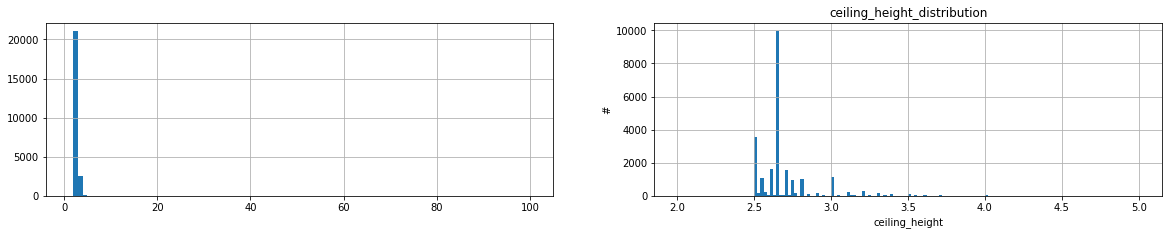

In [19]:
plt.figure(figsize=(20,7))
plt.subplot(2, 2, 1)
df['ceiling_height'].hist(bins=100)
plt.subplot(2, 2, 2)
df['ceiling_height'].hist(range=(2,5),bins=150)
plt.xlabel("ceiling_height")
plt.ylabel("#")
plt.title("ceiling_height_distribution")
df['ceiling_height'].describe()

В параметре "высота потолков" встречаются аномалии: минимальная высота - 1 метр, максимальная - 100 метров. Сфокусирем взор на наиболее ожидаемый дипазон высоты потолков ограничивая их диапазоном от 2х до 5 метров. Ожидаемая высота показала пики наиболее распространненых типов квартир. 2,5 - постройки советских времен, 2,7 - современный комфорт класс (с некотрыми вариациями), 3 метра - элитная недвижимость.

**Столбец: 'days_exposition'**

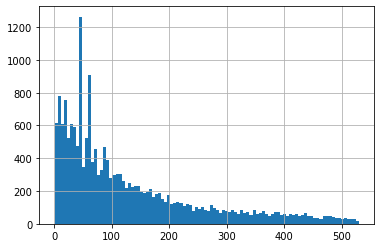

In [20]:
df['days_exposition'].hist(range=(1,530), bins=100)

Самая длительная сделка продолжалась 1580 дней, однако нельзя признать таковую аномальной, так как присутсвуют сделки с аналогичной (по порядку величин) продолжительностью. 

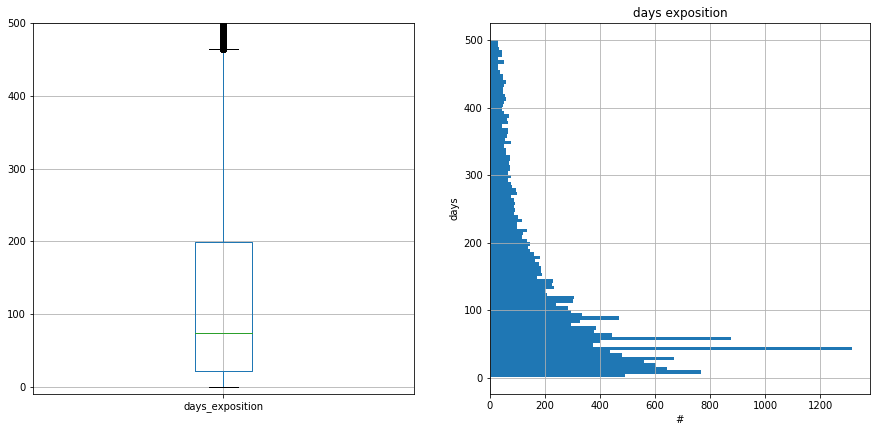

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
df.filter(items=['days_exposition']).boxplot()
plt.ylim(-10, 500)
plt.subplot(2,2,2)
plt.ylabel("days")
plt.xlabel("#")
plt.title("days exposition")
df['days_exposition'].hist(range=(1,500), bins=100, orientation='horizontal')



Нижний «ус» упирается в 0, минимальное значение (на гистограмме days exposition значение 0 мы отбросили так-как ранее заменили им пропущенные значения). Верхний заканчивается около 470 дней — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. Медиана (зелёная линия) не стремится к длинному хвосту высоких значений. Применим discribe()

In [22]:
df['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Cтандартное отклонение очень большое (значения в выборке сильно отличаются от среднего арифметического - в 1.36 раза), в наборе данных есть серьёзные аномалии или выбросы.


Обычный срок продажи от 2 до 200 дней, сответственно все, что больше 200 дней можно считать необычно долгими продажами, с другой стороны продажу менее 1 недели можно считать быстрой. Например, потому что требуется время на просмотр объекта недвижимости покупателем, заклюение предварительного дорговора, получение справок и выписок из гос. рег. органов, внесение залога и т.п. на все это вряд-ли хватит рабочей недели или двух.  


In [23]:
 # "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
# Сделаем срез данных методом query() по столбцу "days_exposition"


df['fast_sell'] = df['days_exposition'] < 7
df['slow_sell'] = df['days_exposition'] > 400
display(df.head())

# Расчитаем средние занчения для быстрых и медленых продаж
print('Доля необычно быстрых продаж составляет:', round(df['fast_sell'].mean(),2))
print('Доля необычно медленных продаж составляет:', round(df['slow_sell'].mean(), 2))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prise_per_m2,week_day_exp,month_exp,year_exp,living_to_total_ratio,kitchen_to_total_ratio,floors_grouping,last_price_mln,fast_sell,slow_sell
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.370370,3,3,2019,0.472222,0.231481,другой,13.00,True,False
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277,первый,3.35,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,0.612500,0.148214,другой,5.20,False,True
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,NaN,NaN,другой,64.90,False,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,0.320000,0.410000,другой,10.00,False,False


Доля необычно быстрых продаж составляет: 0.16
Доля необычно медленных продаж составляет: 0.11


Создадим срезы данных по нескольким параметрам:
last_price_mln, price_per_m2, rooms, 

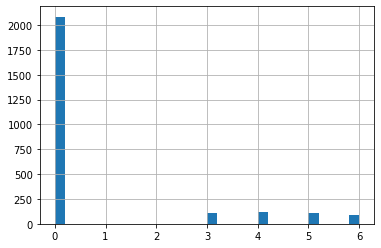

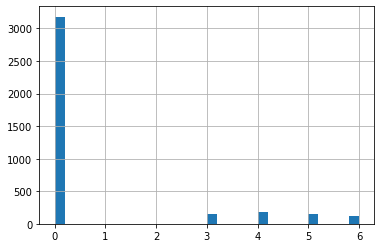

In [24]:
# per_m2_fast = df.pivot_table(index='prise_per_m2', values='fast_sell')
# last_price_fast = df.pivot_table(index='last_price_mln', values='fast_sell')
# rooms_fast = df.pivot_table(index='rooms', values='fast_sell')
# print(per_m2_fast.head())
# print(last_price_fast.head())
# print(rooms_fast.head())

sample = df[(df['fast_sell'] == True)& (df['locality_name'] == 'Санкт-Петербург')]
sample['days_exposition'].hist(bins=30)
plt.show()
df.query('fast_sell == True')['days_exposition'].hist(bins=30)
plt.show()

#rooms_fast.hist(bins=100)
# rooms_fast.hist(bins=5)

#display(df.query('0 < prise_per_m2 < 15000'))


Как мы видим из диаграмм, нет никакой связи между локализацией и сроком сделки. При обзоре таблицы, отфильтрованной по "fast_cell" тоже не обнаружено закономерностей. Т.е. никакие параметры никак не выделяются в качестве маркера, указывающего что сделака будет быстрой. Полагаю, причина в другом. Попробуем сравнить медианы стоимости м2, общей стоимости, количества комнат, и расстояние до центра. Попытемся выяснить, возможно они как-то влияют на ликвидность объектов недвижимости.

 

In [25]:
fields = ['prise_per_m2', 'last_price_mln', 'rooms', 'cityCenters_nearest']


for field in fields:
    print(f"Медиана {field} - быстрых продаж", df.query('fast_sell == True')[field].median())
    print(f"Медиана {field} - обычных продаж", df.query('fast_sell == False and slow_sell == False')[field].median())
    print(f"Медиана {field} - долгих продаж", df.query('slow_sell == True')[field].median())
    print('----------------')


Медиана prise_per_m2 - быстрых продаж 101200.68610634649
Медиана prise_per_m2 - обычных продаж 93913.04347826086
Медиана prise_per_m2 - долгих продаж 94506.79267572357
----------------
Медиана last_price_mln - быстрых продаж 5.3
Медиана last_price_mln - обычных продаж 4.5
Медиана last_price_mln - долгих продаж 5.1
----------------
Медиана rooms - быстрых продаж 2.0
Медиана rooms - обычных продаж 2.0
Медиана rooms - долгих продаж 2.0
----------------
Медиана cityCenters_nearest - быстрых продаж 12572.0
Медиана cityCenters_nearest - обычных продаж 13307.0
Медиана cityCenters_nearest - долгих продаж 11966.0
----------------


Странно, ожидалось что уйдут быстрее объекты с ценой за м2 в среднем ниже, чем в остальных случаях. Но получили с точностью наоборот.
 Возможно это манипуляция рынком - "смотрите даже такие дорогие метры уходят как пирожки", исскуственно завышая рыночные цены на недвижимость
 
 Опять же, ожидалось, что не смотря на высокую цену м2, быстрее всего уйдут в целом более доступные варианты. Однако
это не так. Медианная цена объекта самых быстрых продаж выше и объектов быстрых продаж и медленных продаж.  Это еще один аргумент в пользу версии о манипуляции рынком.

Исключаются из анализа те квартиры,  длительность продаж которых менее 7 и более 200 дней:

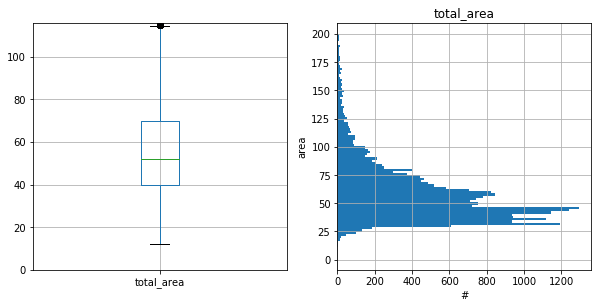

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
df.filter(items=['total_area']).boxplot()
plt.ylim(0, 116)
plt.subplot(2,2,2)
plt.ylabel("area")
plt.xlabel("#")
plt.title("total_area")
df['total_area'].hist(range=(1,200), bins=100, orientation='horizontal')


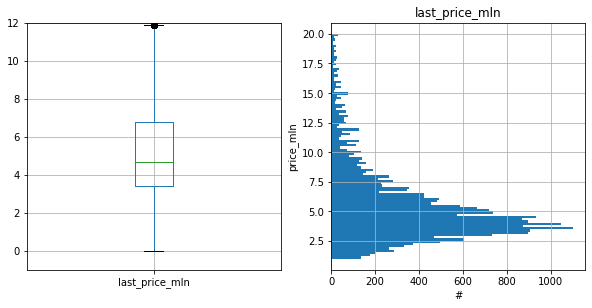

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
df.filter(items=['last_price_mln']).boxplot()
plt.ylim(-1, 12)
plt.subplot(2,2,2)
plt.ylabel("price_mln")
plt.xlabel("#")
plt.title("last_price_mln")
df['last_price_mln'].hist(range=(1,20), bins=100, orientation='horizontal')

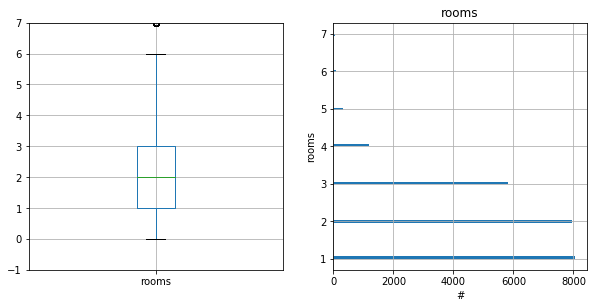

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
df.filter(items=['rooms']).boxplot()
plt.ylim(-1, 7)
plt.subplot(2,2,2)
plt.ylabel("rooms")
plt.xlabel("#")
plt.title("rooms")
df['rooms'].hist(range=(1,7), bins=100, orientation='horizontal')

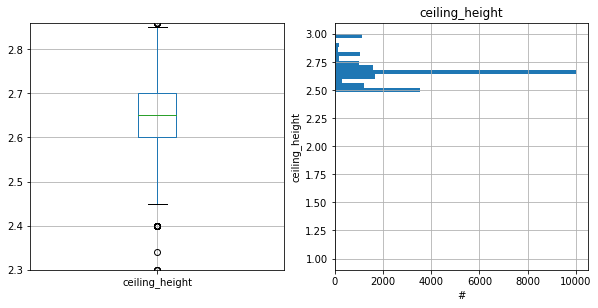

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
df.filter(items=['ceiling_height']).boxplot()
plt.ylim(2.3, 2.86)
plt.subplot(2,2,2)
plt.ylabel("ceiling_height")
plt.xlabel("#")
plt.title("ceiling_height")
df['ceiling_height'].hist(range=(1,3), bins=50, orientation='horizontal')

In [30]:
good_data = df.query('12 < total_area < 116 and last_price_mln < 12 and rooms < 7 and 2.48 < ceiling_height < 4.5')
print('Количество строк датасета составляет:', len(good_data))
print('Удалено строк:', round(((len(df)) - (len(good_data))) / (len(df)) * 100,2), '%')


Количество строк датасета составляет: 21409
Удалено строк: 9.66 %



    
***Вывод***
    
После удаления выбросов и аномалий таблица содержит объекты недвижимости стоимостью до 12 миллионов с площадью больше 12 , но не больше чем 116 квадратных метров, с количеством комнат до 7 и высотой потолков от 2.48  и ниже 4.5 метров.

По высоте потолков:
    
***2,48*** - это высота в кирпичных хрущевках ( по нормативам потолки не могли быть меньше 2,5 метров). Этот же минимальный параметр касается строений из панелей. Хотя, для сокращения расходов, расстояние от пола до потолка в панельном доме хрущевского типа могла быть всего лишь 2, 48 метра. 
    
***4.5*** - это потолки сталинских домов. Строительство сталинских домов продолжалось около 30 лет.Дома сооружались по абсолютно разным проектам. Поэтому потолки сталинских домов разные (от 3 до 4,5 метров).


15986
Корелляция last_price_mln и total_area: 0.654
Корелляция last_price_mln и rooms: 0.363
Корелляция last_price_mln и floor: 0.027
Корелляция last_price_mln и cityCenters_nearest: -0.207


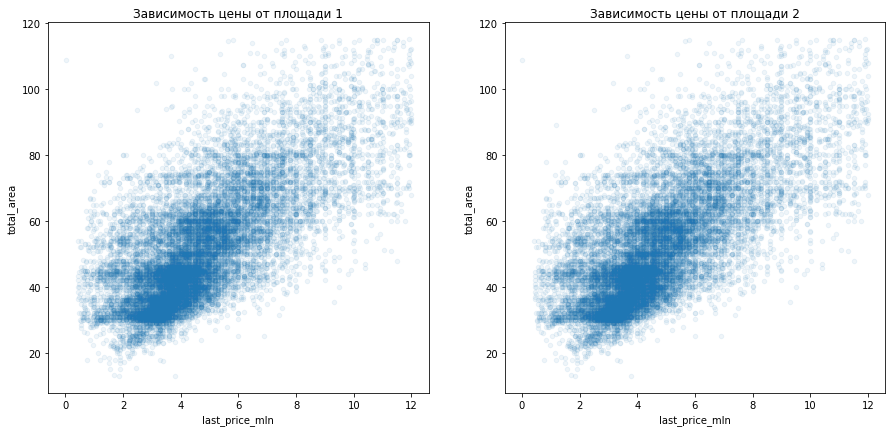

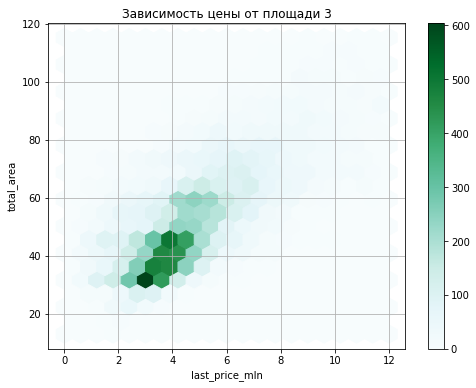

In [31]:
# Присвоим переменной cleaned_data срез таблицы не df, а good_data, без учета очень быстрых и очень медленных продаж
cleaned_data = good_data.query('fast_sell == False and slow_sell == False')
cleaned_data = cleaned_data.copy()
print(len(cleaned_data))

# Определим корреляцию цены с праметрами: общая площадь, число комнат, этажность, растояние до центра
columns = ['total_area', 'rooms','floor', 'cityCenters_nearest']
for column in columns:
    print(f'Корелляция last_price_mln и {column}:', round(df['last_price_mln'].corr(df[column]), 3))

# Отобразим на диаграмме рассеивания:
plt.figure(figsize=(15,15))
ax1= plt.subplot(2, 2, 1)
cleaned_data.plot(
    title='Зависимость цены от площади 1',
    x='last_price_mln',
    y='total_area',
    kind='scatter',
    alpha=0.07,
    ax=ax1
)
ax2 = plt.subplot(2, 2, 2)
filtred_data = cleaned_data.query('last_price_mln < 25 and total_area < 200')
filtred_data.plot(
    title='Зависимость цены от площади 2',
    x='last_price_mln',
    y='total_area',
    kind='scatter',
    alpha=0.07,
    ax=ax2
)
filtred_data.plot(
    title='Зависимость цены от площади 3',
    x='last_price_mln',
    y='total_area',
    kind='hexbin',
    gridsize=20,
    figsize=(8, 6),
    sharex=False,
    grid=True
)

***Вывод***

Наиболее статистически значимой является зависимость цены и площади квартиры, отображенная на графиках выше. Для улучшении визуализации применен дополнительный срез данных ограничивающий цену до 12 млн и площадь до 120 метров. График "Зависимость цены от площади 3" четко отображает кластер с наибольшим скоплением квартир в диапазоне цен от 2.5 млн - 4 млн и общей площади 20 - 40 м2.


Для оценки корреляции цены для этажа квартиры и даты размещения объявления на продажу, строим графики зависимости


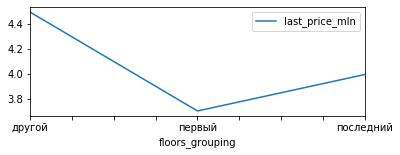

In [32]:
(cleaned_data
     .groupby('floors_grouping')['last_price_mln'].median()
     .plot(x='floors_grouping',y='last_price_mln',figsize=(6, 2),style='-',legend=True)
)

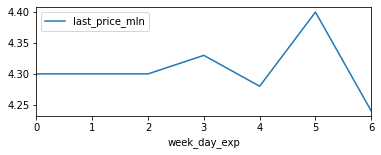

In [33]:
(cleaned_data
     .groupby('week_day_exp')['last_price_mln'].median()
     .plot(x='week_day_exp',y='last_price_mln',figsize=(6, 2),style='-',legend=True)
)

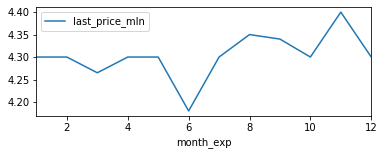

In [34]:
(cleaned_data
     .groupby('month_exp')['last_price_mln'].median()
     .plot(x='month_exp',y='last_price_mln',figsize=(6, 2),style='-',legend=True)
)

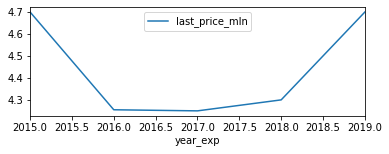

In [35]:
(cleaned_data
     .groupby('year_exp')['last_price_mln'].median()
     .plot(x='year_exp',y='last_price_mln',figsize=(6, 2),style='-',legend=True)
)


    
***Вывод***

Из графиков видно, что: 
    
 - самые дешёвые квартиры на первом этаже, немногим дороже жильё, расположенное на последних этажах.
 - после незначительного спада в среду, стоимость квартир растет к субботе, правда, незначительно(на 2.3%)
 - за период с января 2016 по январь 2018 года медианная стоимость жилой недвижимости не превышала отметку 4.3млн., а к началу 2019 года цены вернулись к уровню 2015 года.



In [36]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений 'locality_name':
top10_names = dict(cleaned_data['locality_name'].value_counts().head(10))
print(top10_names)

# Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

mean_m2_locality = cleaned_data.query(
    'locality_name in @top10_names'
).pivot_table(
    index='locality_name',
    values=['prise_per_m2'],
    aggfunc='mean'
).sort_values(by='prise_per_m2', ascending=False)

display(mean_m2_locality)


{'Санкт-Петербург': 10234, 'посёлок Мурино': 452, 'посёлок Шушары': 359, 'Всеволожск': 280, 'Колпино': 264, 'посёлок Парголово': 253, 'деревня Кудрово': 250, 'Пушкин': 239, 'Гатчина': 218, 'Выборг': 172}


,prise_per_m2
locality_name,
Санкт-Петербург,104623.676833
Пушкин,98965.996031
деревня Кудрово,92484.452267
посёлок Парголово,88694.593146
посёлок Мурино,86023.363239
посёлок Шушары,78221.305318
Колпино,74367.343381
Гатчина,68338.180011
Всеволожск,67185.373909


***Вывод***

Очевидно, что квартиры с самой высокой стоимостью находятся в Санкт-Петербурге, тогда как в Выборге квартиры продаются по самой низкой цене за квадратный метр.

12.0    1163
15.0    1156
13.0    1065
16.0     960
14.0     918
11.0     813
17.0     642
10.0     497
5.0      388
9.0      381
8.0      345
4.0      296
6.0      295
7.0      224
18.0     188
3.0      159
22.0     149
19.0     121
2.0      118
21.0      79
1.0       57
23.0      55
26.0      49
20.0      32
25.0      26
24.0      25
0.0        8
28.0       7
29.0       3
27.0       1
Name: cityCenters_nearest_km, dtype: int64


count    10220.000000
mean        12.422701
std          4.495923
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_km, dtype: float64

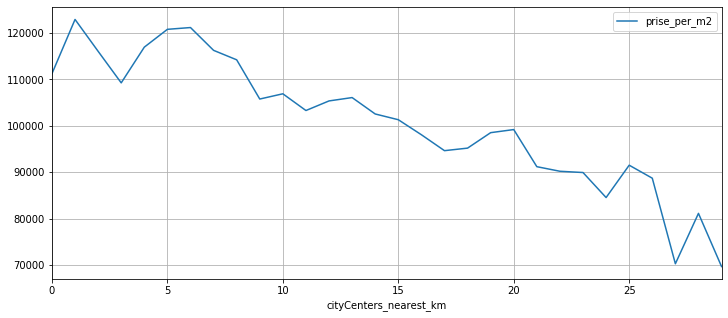

In [37]:

# Создадим столбец с расстоянием до центра в километрах,округлив до целых значений.

cleaned_data['cityCenters_nearest_km'] = round(cleaned_data['cityCenters_nearest'] / 1000)

kilomiters = dict(cleaned_data['cityCenters_nearest_km'].value_counts().head(10))

 
spb_ = cleaned_data.query(
    'locality_name == "Санкт-Петербург"'
)

cleaned_data.query(
    'locality_name == "Санкт-Петербург"'
).pivot_table(
    index='cityCenters_nearest_km', values='prise_per_m2', aggfunc='mean'
).plot(
    grid=True, figsize=(12, 5)
)

spb_.sort_values(by='cityCenters_nearest_km',ascending=True)
print(spb_['cityCenters_nearest_km'].value_counts())
spb_['cityCenters_nearest_km'].describe()

*** Вывод***

Сильное изменение графика наблюдается в диапозоне от 0 до 5  — это и будет центральная зона. 

In [38]:
# Выделите сегмент квартир в центре
top_spb_cityCenter = cleaned_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km < 5')
display(top_spb_cityCenter.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,prise_per_m2,week_day_exp,month_exp,year_exp,living_to_total_ratio,kitchen_to_total_ratio,floors_grouping,last_price_mln,fast_sell,slow_sell,cityCenters_nearest_km
24,8,6500000.0,97.2,2015-10-31,2,2.65,3.0,46.5,1,NaN,False,False,19.6,0.0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,66872.427984,5,10,2015,0.478395,0.201646,первый,6.5,False,False,2.0
99,32,9600000.0,90.0,2017-09-26,4,2.65,5.0,67.0,2,NaN,False,False,8.0,0.0,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104,106666.666667,1,9,2017,0.744444,0.088889,другой,9.6,False,False,3.0
136,16,6500000.0,51.8,2018-08-01,2,3.45,6.0,25.6,2,NaN,False,False,7.3,1.0,Санкт-Петербург,20502.0,3618.0,2.0,533.0,1.0,812.0,163,125482.625483,2,8,2018,0.494208,0.140927,другой,6.5,False,False,4.0
138,8,4800000.0,40.0,2017-11-18,2,2.65,3.0,29.0,2,NaN,False,False,6.0,0.0,Санкт-Петербург,23371.0,2913.0,0.0,NaN,2.0,729.0,80,120000.000000,5,11,2017,0.725000,0.150000,другой,4.8,False,False,3.0
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,NaN,False,False,12.2,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38,102500.000000,1,11,2018,0.552500,0.152500,другой,8.2,False,False,3.0


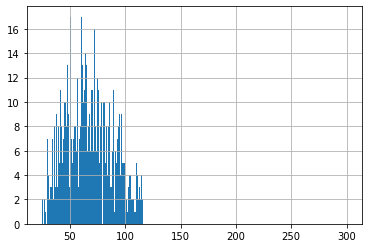

In [39]:
top_spb_cityCenter['total_area'].hist(range=(25,300), bins=300)

***площадь***

Из гистограммы видно,что  диапозон пиковых значений по количеству квартир сдвинулся в  диапозон от 50 до 100 метров. Квартиры большей площадью гораздо меньше, они формируют "длинный хвост" гистограммы.
Данные по гистограмме "total_area_distribution №1"пиковые значения по количеству квартир располагаются в диапозоне от 30 до 80 метров

Text(0.5, 1.0, 'last price distribution (mln)')

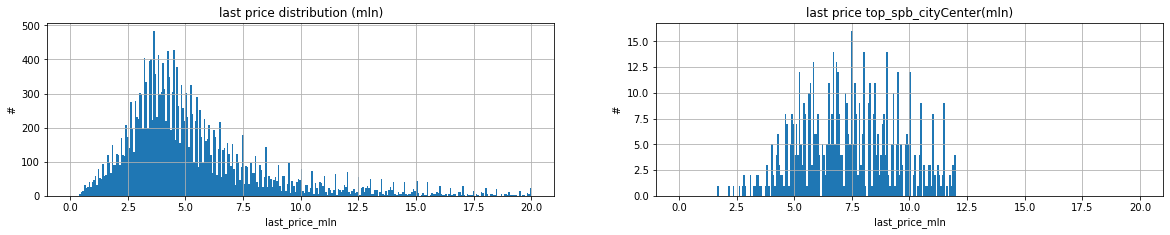

In [40]:
plt.figure(figsize=(20,7))
plt.subplot(2, 2, 2)
top_spb_cityCenter['last_price_mln'].hist(range=(0, 20), bins=300)
plt.xlabel("last_price_mln")
plt.ylabel("#")
plt.title("last price top_spb_cityCenter(mln)")
plt.subplot(2, 2, 1)
df['last_price_mln'] = round(df['last_price']/1000000, 2)
df['last_price_mln'].hist(range=(0, 20), bins=300)
plt.xlabel("last_price_mln")
plt.ylabel("#")
plt.title("last price distribution (mln)")


***цена***

Для предложениий по недвижимости в центральной части города преобладают цены в дипозоне  5 - 12.5 миллионов, тогда как в целом по городу этот параметр колеблется в рамках 2.5 - 7.5 миллионов рублей. 

Text(0.5, 1.0, 'rooms distribution')

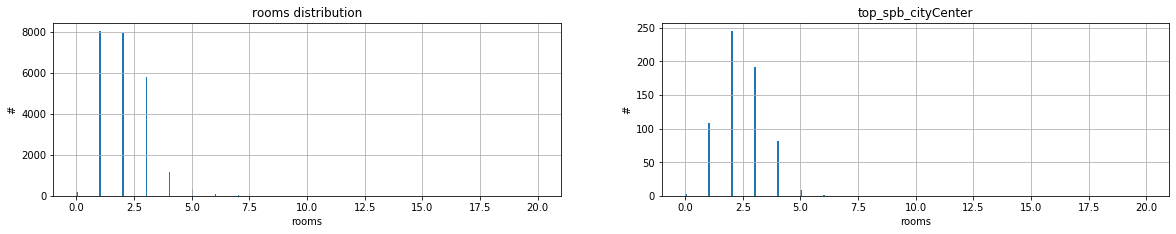

In [41]:
plt.figure(figsize=(20,7))
plt.subplot(2, 2, 2)
top_spb_cityCenter['rooms'].hist(range=(0, 20), bins=300)
plt.xlabel('rooms')
plt.ylabel("#")
plt.title("top_spb_cityCenter")
plt.subplot(2, 2, 1)
df['rooms'].hist(range=(0, 20), bins=300)
plt.xlabel("rooms")
plt.ylabel("#")
plt.title("rooms distribution")


***число комнат***

В центральной части города больше всего продавалась 2-х, 3-х и 4-х комнатное жилье. В целом по городу - в топе "однушки" и "двушки".

Text(0.5, 1.0, 'ceiling_height_distribution')

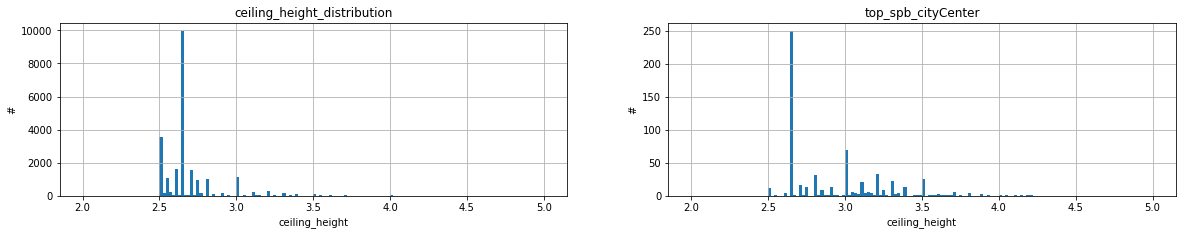

In [42]:

plt.figure(figsize=(20,7))
plt.subplot(2, 2, 2)
top_spb_cityCenter['ceiling_height'].hist(range=(2,5),bins=150)
plt.xlabel("ceiling_height")
plt.ylabel("#")
plt.title("top_spb_cityCenter")
plt.subplot(2, 2, 1)
df['ceiling_height'].hist(range=(2,5),bins=150)
plt.xlabel("ceiling_height")
plt.ylabel("#")
plt.title("ceiling_height_distribution")

***высота потолков***

По прежнему преобладает высота потолков в районе 2,7 метра. Более высокие потолки преобладают в "top_spb_cityCenter", что неудивительно для центральной, исторической части города. 

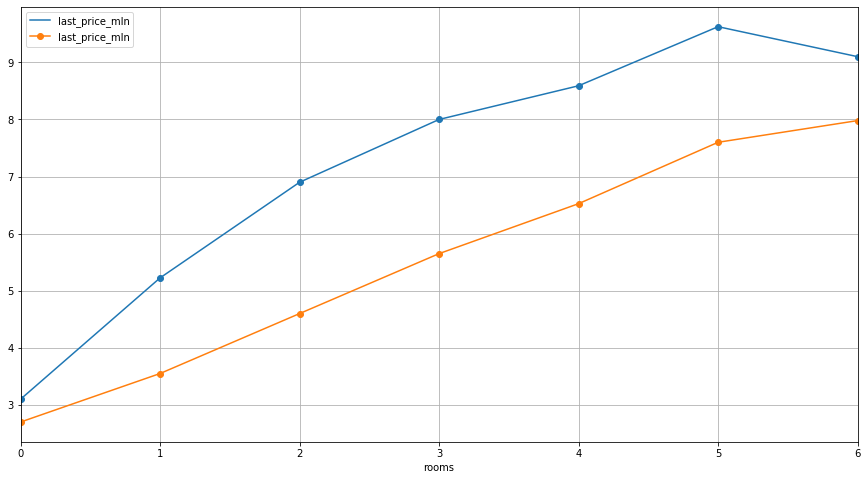

In [43]:
(top_spb_cityCenter
     .sort_values(by='last_price_mln',ascending=True)
     .groupby('rooms')['last_price_mln'].median()
     .plot(x='rooms',y='last_price_mln',style='o-',grid=True,figsize=(15,8),legend=True)
)


(cleaned_data
     .groupby('rooms')['last_price_mln'].median()
     .plot(x='rooms',y='last_price_mln',style='o-',grid=True,figsize=(15,8),legend=True)
)
plt.show()

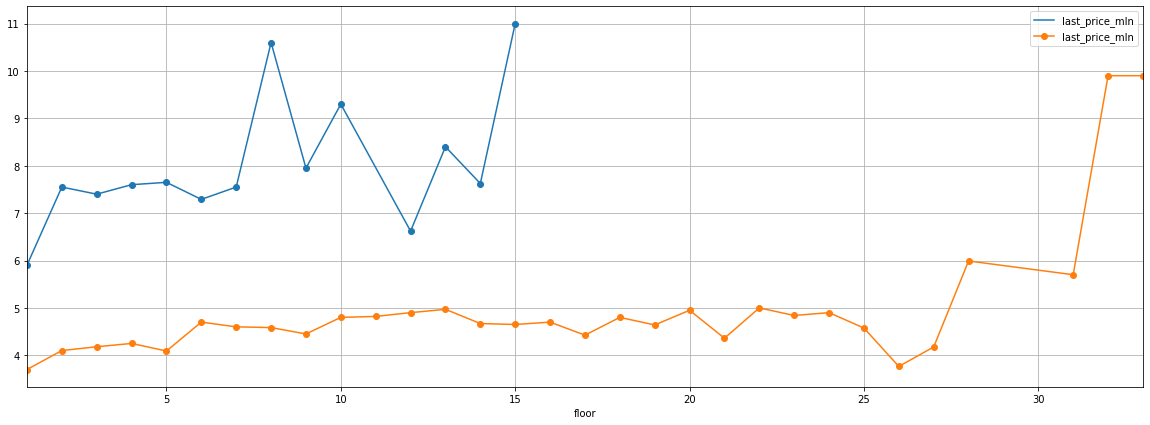

In [44]:
(top_spb_cityCenter
     .sort_values(by='floor',ascending=True)
     .groupby('floor')['last_price_mln'].median()
     .plot(x='floor',y='last_price_mln',style='o-',grid=True,figsize=(20,7),legend=True)
)

(cleaned_data
     .groupby('floor')['last_price_mln'].median()
     .plot(x='floor',y='last_price_mln',style='o-',grid=True,figsize=(20,7),legend=True)
)
plt.show()

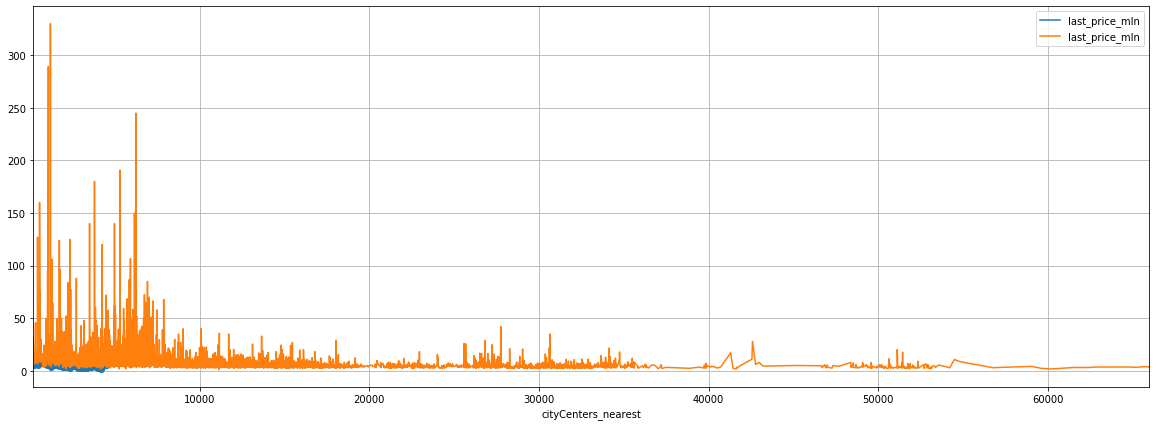

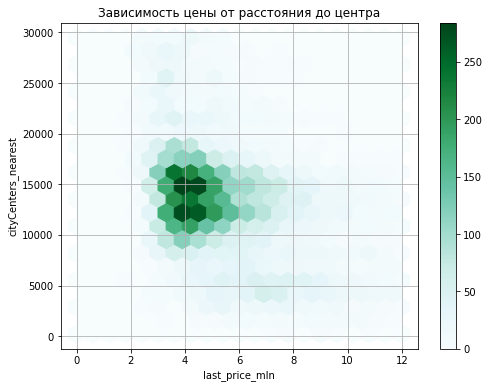

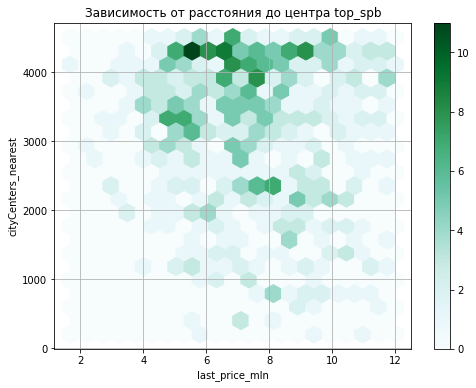

In [45]:
(top_spb_cityCenter
     .sort_values(by='cityCenters_nearest',ascending=True)
     .groupby('cityCenters_nearest')['last_price_mln'].median()
     .plot(x='cityCenters_nearest',y='last_price_mln',style='o-',grid=True,figsize=(20,7),legend=True)
)

(df
     .groupby('cityCenters_nearest')['last_price_mln'].median()
     .plot(x='cityCenters_nearest',y='last_price_mln', style='-',grid=True,figsize=(20,7),legend=True)
)
plt.show()
cleaned_data.query(
    'last_price_mln < 40 and cityCenters_nearest_km < 30'
).plot(
    title='Зависимость цены от расстояния до центра',
    x='last_price_mln',
    y='cityCenters_nearest',
    kind='hexbin',
    gridsize=20,
    figsize=(8, 6),
    sharex=False,
    grid=True
)
top_spb_cityCenter.query(
    'last_price_mln < 40'
).plot(
    title='Зависимость от расстояния до центра top_spb',
    x='last_price_mln',
    y='cityCenters_nearest',
    kind='hexbin',
    gridsize=20,
    figsize=(8, 6),
    sharex=False,
    grid=True
)


Из графика видна сильная зависимость ценый жилплощади от расстояния до центра. Чем ближе к центру, тем дороже квартира

Последняя диаграмма рассеивания показывает максимальное количество квартир в центральной зоне Санкт-Петербурга, расположенных на расстоянии 4.2 - 4.8 километров от центра с ценой выше 5 миллионов, но не более 7.5.

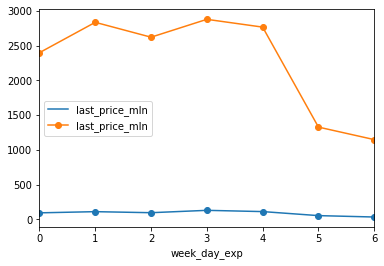

In [46]:
(top_spb_cityCenter
     .groupby('week_day_exp')['last_price_mln'].count()
     .plot(x='week_day_exp',y='last_price_mln',style='-o',legend=True)
)

(cleaned_data
     .groupby('week_day_exp')['last_price_mln'].count()
     .plot(x='week_day_exp',y='last_price_mln',style='-o',legend=True)
)

plt.show()

In [47]:
# Пика цены на жилье достигают по Четвергам и значительно падают в выходные дни (Суббота и Воскресенье)

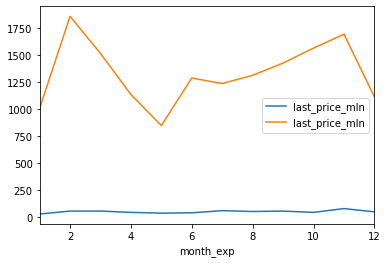

In [48]:
(top_spb_cityCenter
     .groupby('month_exp')['last_price_mln'].count()
     .plot(x='month_exp',y='last_price_mln',style='-',legend=True)
)

(cleaned_data
     .groupby('month_exp')['last_price_mln'].count()
     .plot(x='month_exp',y='last_price_mln',style='-',legend=True)
)

plt.show()


Пика достигает к началу февраля, снижаясь к маю,затем снова спроисходит скачек цен с мая по июнь и далее происходит плавное повышение цен до ноября. С ноября до января включительно стоимость снижается.

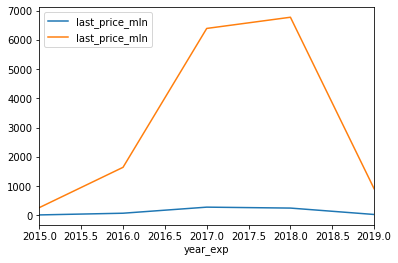

In [49]:
(top_spb_cityCenter
     .groupby('year_exp')['last_price_mln'].count()
     .plot(x='year_exp',y='last_price_mln',style='-',legend=True)
)

(cleaned_data
     .groupby('year_exp')['last_price_mln'].count()
     .plot(x='year_exp',y='last_price_mln',style='-',legend=True)
)

plt.show()

По годам : с 2015 года по июнь 2016 - рост. С 2018 года вплоть до 03 мая 2019 года резкое падение, возможно до уровня цен 2015 года( здесь тоже недостаточно данных)

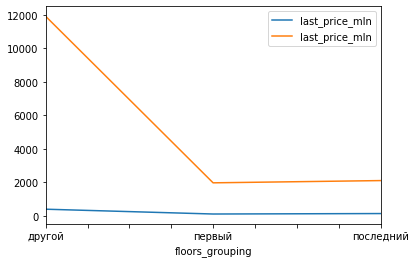

In [50]:
(top_spb_cityCenter
     .groupby('floors_grouping')['last_price_mln'].count()
     .plot(x='floors_grouping',y='last_price_mln',style='-',legend=True)
)

(cleaned_data
     .groupby('floors_grouping')['last_price_mln'].count()
     .plot(x='floors_grouping',y='last_price_mln',style='-',legend=True)
)

plt.show()

## Общий вывод


Рыночная стоимость объектов недвижимости сильно зависит от расстояния до центра и от площади. Чем ближе к центру, тем дороже квартира. Самые ходовые 1, 2-х комнатные квартиры, с некоторым отрывом 3-х комнатные. Примечательно, что  с увеличением комнат цена за квадратный метр может снижаться. Также, цена на жилье будет ниже, если квартира находится на первом или последнем этаже.

Рыночная стоимость подвержена цикличности: с 2015 года по июнь 2016 года наблюдается рост. С 2018 года до 03 мая 2019 года резкое падение. 

Недвижимость дорожает к началу февраля, с мая по июнь. Плавное повышение цен до ноября. С ноября до января включительно стоимость снижается.

День недели также влияет на цены жилья: по Четвергам цены самые высокие и значительно падают в Субботу и Воскресенье.


В представленном на анализ датасете большое количество пропущеных значений,возникших в результате как технологических проблем, так и в результате человеческого фактора (в т.ч. мошенничества). Не стоило бы приступать к выполнению задания не пообщавшись как со специалистами в области продажи недвижимости, так и со специалистами, предоставившими данную выгрузку.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод
